<a href="https://colab.research.google.com/github/unicornlaunching/langchain-and-elevenlabs-with-pdf-analysis/blob/main/Python_Quickstart_PDF_Analysis_with_Langchain_and_OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Quickstart - PDF Analysis with Langchain and OpenAI

Before you begin, load your PDF(s) into a folder you create called data.

Your folder should look like this:

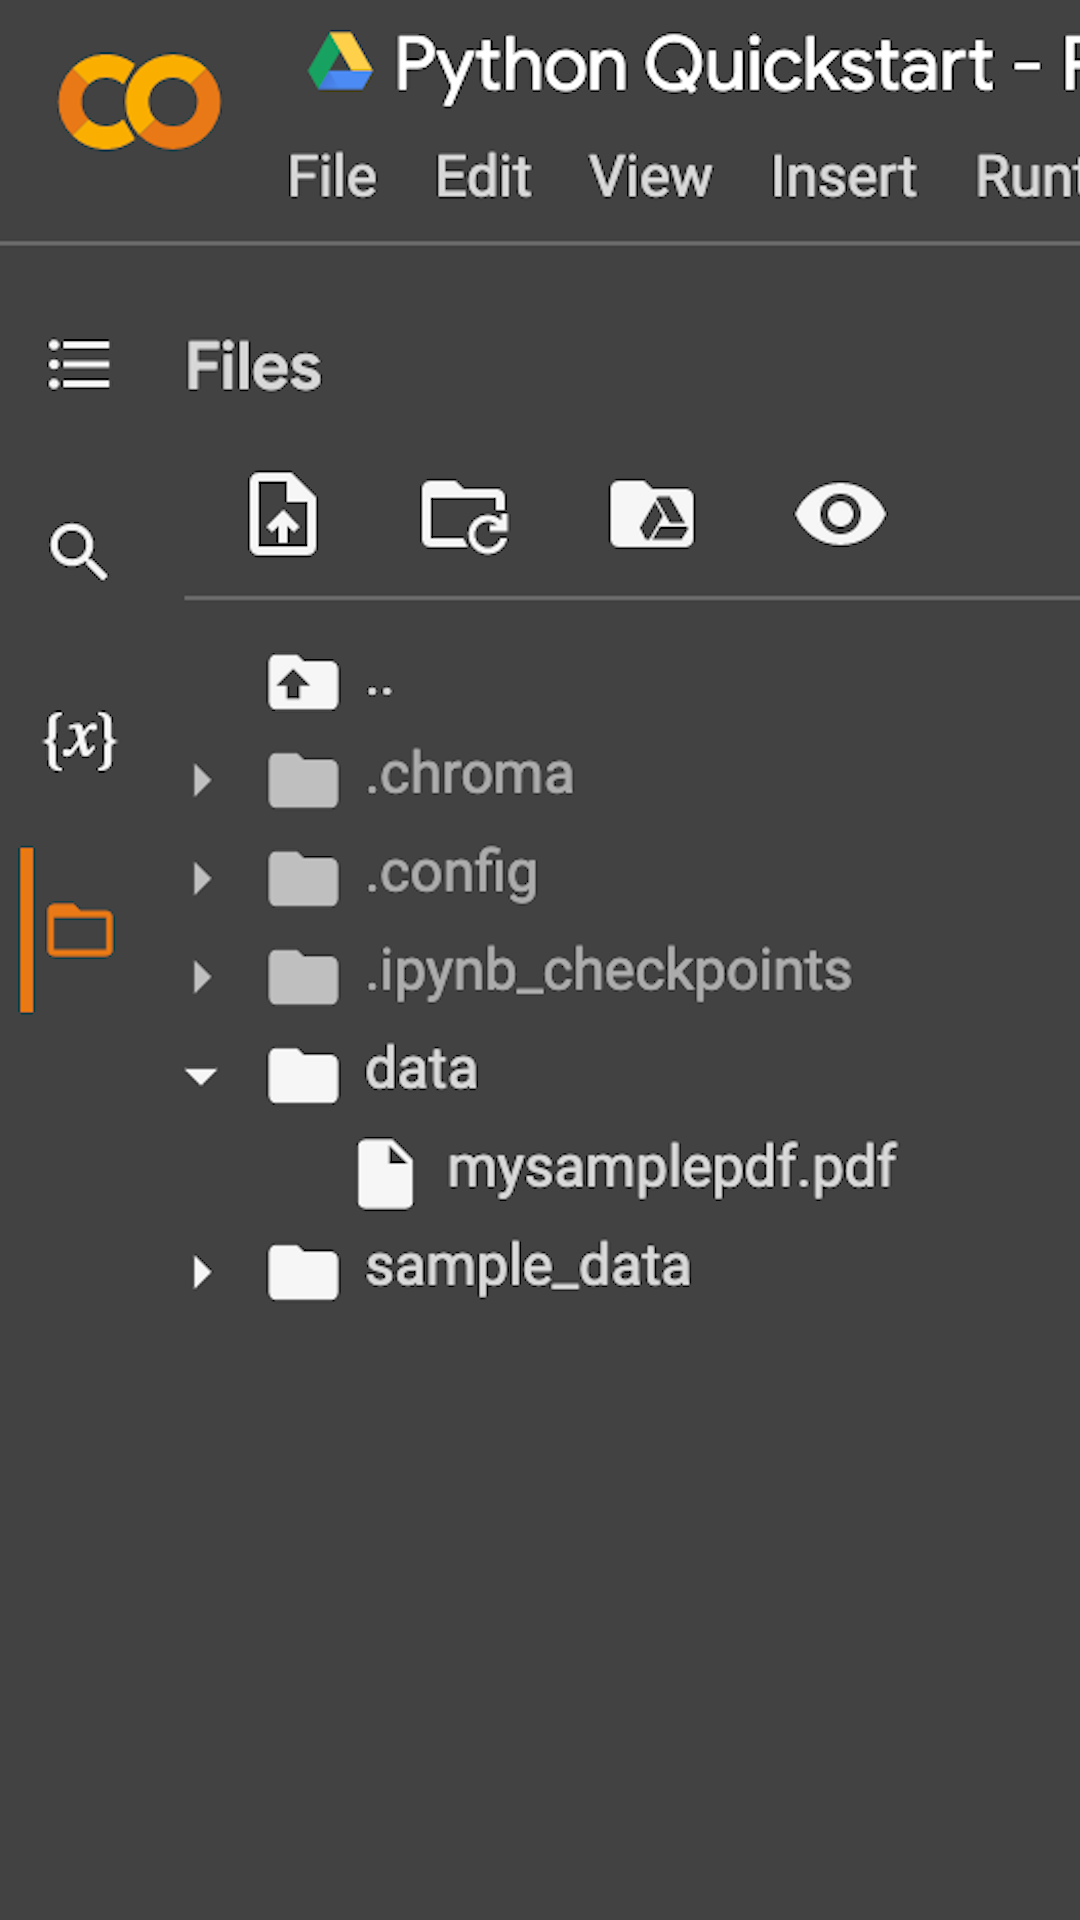

In [ ]:
!pip install langchain
!pip install openai
!pip install python-magic
!pip install nltk

!pip install unstructured
!pip install python-magic-bin
!pip install chromadb

In [3]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI, VectorDBQA
from langchain.document_loaders import DirectoryLoader
import magic
import os
import nltk

In [ ]:
!pip install unstructured 

In [ ]:
!pip install unstructured[local-inference]

In [ ]:
# if this step fails don't worry keep going to the next step as if nothing ever happened :P
pip install python-magic-bin

In [ ]:
nltk.download('averaged_perceptron_tagger')

notice where I load the data

In [12]:
loader = DirectoryLoader('../content/data', glob='**/*.pdf')

In [ ]:
documents = loader.load()

In [14]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

In [15]:
texts = text_splitter.split_documents(documents)

Replace
REPLACE_THIS_TEXT_WITH_YOUR_OPEN_AI_KEY_NO_QUOTATION_MARKS
with your openAI API key

In [ ]:
%env OPENAI_API_KEY=REPLACE_THIS_TEXT_WITH_YOUR_OPEN_AI_KEY_NO_QUOTATION_MARKS

In [17]:
embeddings = OpenAIEmbeddings(openai_api_key=os.environ['OPENAI_API_KEY'])

In [ ]:
docsearch = Chroma.from_documents(texts, embeddings)

In [ ]:
qa = VectorDBQA.from_chain_type(llm=OpenAI(), chain_type="stuff", vectorstore=docsearch)

In [ ]:
query = "what's in this data?"
qa.run(query)